# Introduction - NLP

NLP (Natural Language Processing) is a technique used to gain value and understanding from text. NLP can do many things, ranging from topic modeling to filtering out toxic comments. For the NLP exercise, I thought it would be a fun idea to get Reddit comments and try out some of these techniques. I took a dataset that was about Reddit posts on trump. The dataset was extremely unorganized and I had to clean/organize it with power query.

## What techniques/appliances will i run?

### 1. Topic generation (LDA)
<br>
There are many comments from many different posts. I'm going to generate topics based on this data. This will happen with LDA, LDA is a technique used to generate topics when it comes to a large sum of texts. In short, what this does is that it looks at words and tries to find combinations of these and see how well they match. It is important to note that one does not see the topic name but rather the keywords (words that most correspond together).

### 2. Generating reddit trump comments
<br>
Unlike the first exercise I did, in the second one we have to create our model and add layers to it. What is done with the generation of comments?  creating and training the model, the creation of the model happens with Keras where the layers are created (LSTM/DROPOUT Layers). An important step is making sure that you turn all the different comments into 1 long string. The idea here is to play around with the hyperparameters to find the hyperparameters that deliver the best results. Something important to note here is just how heavy it is to run this. I had to use a cloud environment to run this, for this I used the Kaggle cloud. Anoyther note is that only 20% of the comments were used since more comments resulted in training time taking too long.

### 3. Sumarization
<br> 
Here we will make use of a pre-trained model, sumarization can be done in many ways. For the exercise I decided to use the gensim library which has a feature that allows for TextRank Sumarization. Textrank works in a way that tries to find the most relevant sentances. This was by far the easiest part of the exercise, but the result was really cool to see! 

### 4. Conclusion
<br> 
The conclusion will contain my most important findings/what i learned with these exercises

### Data Insight 

Creating some insights to knnow what our data looks like

In [10]:
import base64
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
dataset = pd.read_excel("Trump_data.xlsx")

In [12]:
dataset

,Id,Title,Post Date,Comments,Comments.3
0,22,Angela Merkel says Germany can no longer rely ...,2017-05-28,Am i taking crazy pills? \nHas everyone taking...,183
1,22,Angela Merkel says Germany can no longer rely ...,2017-05-28,"The thing is, Europe views NATO as it was orig...",319
2,22,Angela Merkel says Germany can no longer rely ...,2017-05-28,She doesn't call out the US anymore than she c...,242
3,22,Angela Merkel says Germany can no longer rely ...,2017-05-28,"Yeah, this is exactly what he campaigned for. ...",48
4,22,Angela Merkel says Germany can no longer rely ...,2017-05-28,Essay question: Here are two trump tweets. Com...,65
...,...,...,...,...,...
5054,172,The FBI gathered intelligence in the summer of...,2017-04-22,"Yes, because everyone in America is a liberal,...",84
5055,172,The FBI gathered intelligence in the summer of...,2017-04-22,everyone knows trump is a puppet for putin. \r...,48
5056,172,The FBI gathered intelligence in the summer of...,2017-04-22,"Oh good, the Totally Not Russian accounts are...",56
5057,172,The FBI gathered intelligence in the summer of...,2017-04-22,"Bad post, bad article.\r\n\r\n",26


In [13]:
dataset.shape

(5059, 5)

In [14]:
# Creating a bar chart to see the distribution on comments

data = [go.Bar(
            x = dataset.Id.unique(),
            y = dataset.Id.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = dataset.Id.value_counts().values
                        ),
            text='Comments per post'
    )]

layout = go.Layout(
    title='Comments distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [15]:
# 102 Posts
len(dataset.Id.unique())

102

In [16]:
# Barchart on word frequency

all_words = dataset.Comments.str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

(-0.5, 399.5, 199.5, -0.5)

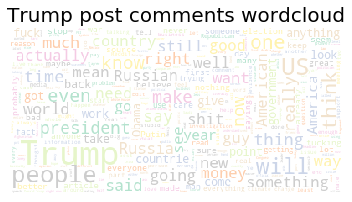

In [17]:
# Creating a wordcloud of most common words, removing stopwords

wc = WordCloud(background_color="white", max_words=10000,stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(dataset.Comments))

plt.title("Trump post comments wordcloud", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

## 1. Topic generation (LDA)

Usage of NLTK,LDA to generate topics from comments

In [18]:
import nltk

In [19]:
# Storing the first text element as a string
# here we se ehow the string is split up into different items.

first_text = dataset.Comments.values[1]
print(first_text)
print("="*90)
print(first_text.split(" "))

The thing is, Europe views NATO as it was originally implemented as a deterrent against Russia. NATO, even at current spending levels, could easily stop Russian aggression dead in it's tracks. The difference is that the US views NATO as a global military force against terrorism, which requires much more financing.  


['The', 'thing', 'is,', 'Europe', 'views', 'NATO', 'as', 'it', 'was', 'originally', 'implemented', 'as', 'a', 'deterrent', 'against', 'Russia.', 'NATO,', 'even', 'at', 'current', 'spending', 'levels,', 'could', 'easily', 'stop', 'Russian', 'aggression', 'dead', 'in', "it's", 'tracks.', 'The', 'difference', 'is', 'that', 'the', 'US', 'views', 'NATO', 'as', 'a', 'global', 'military', 'force', 'against', 'terrorism,', 'which', 'requires', 'much', 'more', 'financing.', '', '\n\n']


In [20]:
# Here one can see the tokenization, the result looks the same as splitting a string!
first_text_list = nltk.word_tokenize(first_text)
print(first_text_list)

['The', 'thing', 'is', ',', 'Europe', 'views', 'NATO', 'as', 'it', 'was', 'originally', 'implemented', 'as', 'a', 'deterrent', 'against', 'Russia', '.', 'NATO', ',', 'even', 'at', 'current', 'spending', 'levels', ',', 'could', 'easily', 'stop', 'Russian', 'aggression', 'dead', 'in', 'it', "'s", 'tracks', '.', 'The', 'difference', 'is', 'that', 'the', 'US', 'views', 'NATO', 'as', 'a', 'global', 'military', 'force', 'against', 'terrorism', ',', 'which', 'requires', 'much', 'more', 'financing', '.']


In [21]:
# Adding option to remove stopwords.
# We can see that the nltk provides a set of 179 stopwords
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)

179

In [22]:
# As can be read below removing stopwords can remove quite a few words from a sentance.
first_text_list_cleaned = [word for word in first_text_list if word.lower() not in stopwords]
print(first_text_list_cleaned)
print("="*90)
print("Length of original list: {0} words\n"
      "Length of list after stopwords removal: {1} words"
      .format(len(first_text_list), len(first_text_list_cleaned)))

['thing', ',', 'Europe', 'views', 'NATO', 'originally', 'implemented', 'deterrent', 'Russia', '.', 'NATO', ',', 'even', 'current', 'spending', 'levels', ',', 'could', 'easily', 'stop', 'Russian', 'aggression', 'dead', "'s", 'tracks', '.', 'difference', 'US', 'views', 'NATO', 'global', 'military', 'force', 'terrorism', ',', 'requires', 'much', 'financing', '.']
Length of original list: 59 words
Length of list after stopwords removal: 39 words


In [23]:
# Getting a stemmer from nltk, the stemmer matches the word in 1 tense. This is done to only appoint 1 vector to each word.
stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem("racing"))
print(stemmer.stem("race"))
print(stemmer.stem("raced"))

race
race
race


In [24]:
# Is done to get the correct form of the word
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [25]:
# Defining our sentence
sentence = ["I love to eat Burgers", 
            "I love to eat Fries"]
vectorizer = CountVectorizer(min_df=0)
sentence_transform = vectorizer.fit_transform(sentence)

In [26]:
print("Features {}".format(vectorizer.get_feature_names()))
print("Vector {}".format(sentence_transform.toarray()))

Features ['burgers', 'eat', 'fries', 'love', 'to']
Vector [[1 1 0 1 1]
 [0 1 1 1 1]]


In [27]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [28]:
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [29]:
# Storing the entire training text in a list
text = list(dataset.Comments.values)
# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [30]:
feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the top 50 words
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')


In [31]:
# Using LDA to generate topics
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [32]:
lda.fit(tf)
tf

<5059x5465 sparse matrix of type '<class 'numpy.int64'>'
	with 62182 stored elements in Compressed Sparse Row format>

In [33]:
tf.shape

(5059, 5465)

## Topic Results

Topics that resulted from LDA
<br>
<br>
The results of the topic were not as good as i had hoped, but i cant expect muc more from 5500 rows of data. I was happy to see that some topics seemed to match with each other indicating that it can work provided is has more data.

In [34]:
# Will display the keywords belonging to a topic
n_top_words = 5
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:http com news www day

Topic #1:good idea bot did thank

Topic #2:swamp ah paul card sa

Topic #3:islam knew hilarious true fuel

Topic #4:car global warming wonder military

Topic #5:canadian sad jane goodall block

Topic #6:golf pussy small eat tough

Topic #7:trump like people country don

Topic #8:fucking base ban maybe want

Topic #9:trump just russia say like

Topic #10:afghanistan joke helped taliban girl


In [35]:
first_topic = lda.components_[0]
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]

In [36]:
first_topic_words

['http',
 'com',
 'news',
 'www',
 'day',
 'lol',
 'source',
 'org',
 'html',
 'surprise',
 'cnn',
 'title',
 '2017',
 'earth',
 'wikipedia',
 'boy',
 '2016',
 'en',
 'empire',
 'like',
 'election',
 'reform',
 'fox',
 'wiki',
 'need',
 'won',
 'article',
 'authority',
 'buddy',
 'credibility',
 'site',
 '06',
 'commondreams',
 'fuck',
 'son',
 'status',
 'lack',
 'manufacturing',
 'hospital',
 'isn',
 'imgur',
 'jpg',
 'political',
 'mass',
 '99',
 'irony',
 '17',
 'omg',
 'community',
 'msnbc']

## 2. Generating reddit trump comments
Due to the big training time the reader is reffered to the kaggle notebook: https://www.kaggle.com/pontiacboy/nlp-trump-post-comments

## 3. Text Sumarization

### Running on Trump Comments data

In [37]:
from gensim.summarization.summarizer import summarize

In [45]:
dataset = dataset.drop(dataset.tail(4500).index)

text = dataset.Comments
dataset.Comments = text.str.strip('.!? \n\t\r')
text = '\n'.join(dataset.Comments).lower()
text = text.strip('.!? \n\t\r')
len(text.split())

19002

In [51]:
sumerization = summarize(text = text,word_count = 100)

In [52]:
len(sumerization)

633

In [53]:
sumerization

"and yes, the previous edit was necessary, because people in comments below were trying to spin the original comment to say look, trump's doing fine, and the rest of the world actually thinks he's great.\ni want to read the fanfiction of the founding fathers travelling forward in a time machine, seeing trump, going back and specifically setting up the branches of government so that he can't screw up all their hard work\nyou know this wouldn't have been a big deal, but since trump feels the need to criticize people in the past for low energy, serves his ass right to be made fun of fun not having enough energy on day 2 of his trip"

### Running on testset
Seeing that the result from sumarizing our own text ended poorly (as expected, comments bundled up together cant really be summerized). I decided to see how wel this would perform, i googled to find some text test sets which were suited for this kind of work and ran it through the gensim sumarization.

In [56]:
test_text = "Testing Unusual proteins could improve cancer diagnosis and reduce deaths The key to treating cancer is to catch it early. But identifying the subtle changes in cells that betray their turncoat tendencies requires skill-and good luck-on the part of pathologists. Many cancers are not spotted until too late, when the rebel colonies are well enough established to put up a fight and found new mutinous outposts. Matritech, a Massachusetts-based start-up company, has developed a diagnostic technique that detects bladder cancer more easily-and possibly more effectively-than existing methods can. Matritech's test, which the company expects the Food and Drug Administration to approve by this summer, measures the amount of a particular type of protein in urine. Bladder cancer patients excrete this substance, called a nuclear matrix protein, in greater amounts than healthy subjects do. All cell nuclei contain matrix proteins, constituents that give the nucleus its shape and organize the chromosomes. Researchers have known of their existence since the 1970s. Their possible value has become apparent just in the past few years, however, since investigators at the Massachusetts Institute of Technology showed that some nuclear matrix proteins in cancer cells are different from those in normal cells. Others are present in elevated amounts. The unusual proteins seem to explain why the nuclei of cancer cells are often oddly shaped. The proteins escape into body fluids, where they can be identified using antibodies. Thus, the way is opened to tests for abnormal matrix proteins or, as in the case of Matritech's bladder cancer test, a normal one in unusual amounts. Theres been all this hoopla about genetic screening, but nuclear matrix protein testing could have the biggest impact of all, says Lance Willsey of Harvard Medical School. Stephen D. Chubb, Matritechs chief executive, says his companys test, called NMP22, detected all cases of invasive disease in a trial with 1,000 subjects who had previously been treated for bladder cancer and were being monitored for recurrences-which are very common. Furthermore, it found about 70 percent of cases of bladder cancer that was still localized and in less need of urgent treatment. A negative result meant patients had a 90 percent chance of cancer not developing in the next three to six months-a useful predictive ability, because that is the usual interval between follow-up visits for bladder cancer patients. Those figures, Chubb notes, indicate that NMP22 could be used instead of current techniques, which involve examining cells from the bladder shed in urine or viewing the inside of the bladder with a fiber-optic device (cystoscopy). Moreover, Matritechs test is one sixth the price of cystoscopy, which is typically billed at $300, and obviates any risk of infection. Matritech is initially seeking approval for NMP22 solely to check for recurrences of bladder cancer. But Chubb is not averse to the idea that NMP22 could be used more widely to screen for the disease in people who have not previously been diagnosed. NMP22 might be the first of a series of matrix protein-based tests. Although the matrix protein that NMP22 detects is found in low levels in nuclei throughout the body, other nuclear matrix proteins are more specific. In April, Robert H. Getzenberg of the University of Pittsburgh Cancer Institute and his colleagues reported their discovery of five matrix proteins (not yet employed in any test) that occur exclusively in bladder cancer cells-thus suggesting the possibility of even more accurate diagnosis. Chubb states that Matritech has strong patent protection for all uses of nuclear matrix proteins as cancer diagnostics and that it is working on such tests for early detection of prostate, colon, cervical and breast cancer. Most of these will be based on proteins that occur exclusively in particular cancers. But Willsey wonders whether Matritech has sufficient resources to develop nuclear matrix protein-based tests as fast as the company, and he, would like. Nuclear matrix proteins could represent targets for therapeutic agents, too. The difficulty is that drugs have trouble penetrating cell nuclei. But Chubb says Matritech is giving the development of such therapeutics serious thought-and about 10 percent of its research budget."

In [59]:
len(test_text)

4338

In [57]:
sumerization = summarize(text = test_text)

In [58]:
sumerization

"Matritech, a Massachusetts-based start-up company, has developed a diagnostic technique that detects bladder cancer more easily-and possibly more effectively-than existing methods can.\nThus, the way is opened to tests for abnormal matrix proteins or, as in the case of Matritech's bladder cancer test, a normal one in unusual amounts.\nChubb, Matritechs chief executive, says his companys test, called NMP22, detected all cases of invasive disease in a trial with 1,000 subjects who had previously been treated for bladder cancer and were being monitored for recurrences-which are very common.\nGetzenberg of the University of Pittsburgh Cancer Institute and his colleagues reported their discovery of five matrix proteins (not yet employed in any test) that occur exclusively in bladder cancer cells-thus suggesting the possibility of even more accurate diagnosis.\nChubb states that Matritech has strong patent protection for all uses of nuclear matrix proteins as cancer diagnostics and that it 

In [60]:
len(sumerization)

1240

## Conclusion

### Overall conclusion
I can safely say that i do know how NLP works and how the workflow needs to be. I am no expert on it, but was able to apply some cool stuff on a reddit dataset. Though alot of what i did, comes from a tutorial it is really cool to see how this network performs. The results i got were pretty bad but that is to be expected when the data i give is not the best.
<br>
<br>
What did i gain from this? I learned how NLP works and what i can do with it, there are a lot of tutorials online with stuff you can do with it and why it is usefull to use what is available.

### 1. Topic Generation
There was not much of a surprise on this theme since for our project we had done extensive work with LDA. Though I was not the one that did most of the work on it I looked at how things were done. It was nice to be able to apply the technique by myself where it mattered for me. I learned that not all data is as useable to run through an LDA (or I just need to better fine-tune the parameters) because the results where not what I expected.

### 2. Generating Reddit Trump Comments
This was possibly the most fun because not only did I learn how this worked, but I managed to use the Kaggle cloud which was fun! And has shown me how to use this useful tool to not run everything locally. The results were also pretty good and fun, I simultaneously did this with Rick. Rick had better knowledge of this and I was picking things from him. 

### 3. Text Summarization
This was fun, first I ran it and came back with a result that was twice the size of my data and I thought "what is this????" 
<br>
Of course, i knew my data was not the best for text summarization but I still decided to try it out and was rather intrigued by the results that came from it. But I decided to look for some test set online and managed to find some good text that fit the model that was being sued. And was surprised as to how good the actual summary was!